# Import Associated Libraries

In [1]:
import pyxdf
import mne
import scipy
import numpy as np
import matplotlib.pyplot as plt

# Import Example Data from Lab Recoder

In [7]:
# -- |Data details| --
participant_id = '00'
session = '01'

# -- |File import| --
streams, header = pyxdf.load_xdf(f"../Data/sub-P0{participant_id}/ses-S0{session}/eeg/sub-P0{participant_id}_ses-S0{session}_task-Default_run-001_eeg.xdf") #Example Data from Lab Recoder
streams

[{'info': defaultdict(list,
              {'name': ['obci_eeg1'],
               'type': ['EEG'],
               'channel_count': ['8'],
               'nominal_srate': ['250'],
               'channel_format': ['float32'],
               'source_id': ['openbcigui'],
               'version': ['1.1000000000000001'],
               'created_at': ['94731.563174800001'],
               'uid': ['7625316b-071a-4a3f-9c50-62aa8e1d7df9'],
               'session_id': ['default'],
               'hostname': ['LAPTOP-NSE7QKJC'],
               'v4address': [None],
               'v4data_port': ['16572'],
               'v4service_port': ['16572'],
               'v6address': [None],
               'v6data_port': ['16572'],
               'v6service_port': ['16572'],
               'desc': [None],
               'stream_id': 2,
               'effective_srate': 250.07803924602254}),
  'footer': {'info': defaultdict(list,
               {'first_timestamp': ['95188.40480210001'],
                'l

In [8]:
# -- |EEG data| --
EEG = [data for data in streams if data['info']['type'] == ['EEG']][0] #From Steam variable this query is EEG data
raw_data = (EEG["time_series"].T)/1000000 # Convert to volt
raw_data.shape # It contain with 8 channel of EGG data

(8, 54150)

In [25]:
a = np.array([[1, 2],[3, 4]])
b = np.array([[1, 1],[2, 2]])
print(a-b)

[[0 1]
 [1 2]]


In [26]:
c = np.array([1,2,3])
np.tile(c,(3,1))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [45]:
(EEG["time_series"].T)/1000000

array([[ 0.00309891,  0.00305115,  0.00308295, ...,  0.0039283 ,
         0.00394727,  0.00399864],
       [ 0.01333894,  0.01328999,  0.01329193, ...,  0.01372717,
         0.01371474,  0.01373921],
       [ 0.01292722,  0.01297398,  0.01296084, ...,  0.01403408,
         0.01403146,  0.01397929],
       ...,
       [-0.00835685, -0.00821469, -0.00813452, ..., -0.00879277,
        -0.00865583, -0.00869525],
       [ 0.01471187,  0.01475787,  0.01476547, ...,  0.01443585,
         0.01445425,  0.01441685],
       [ 0.00285083,  0.002891  ,  0.00287553, ...,  0.00468222,
         0.00468068,  0.0046383 ]])

In [41]:
K = [1,1,1,1,1,1,1]
raw_data = ((EEG["time_series"].T)/1000000)[:-1,:]
EOG = ((EEG["time_series"].T)/1000000)[-1,:]
raw_data

array([[ 0.00309891,  0.00305115,  0.00308295, ...,  0.0039283 ,
         0.00394727,  0.00399864],
       [ 0.01333894,  0.01328999,  0.01329193, ...,  0.01372717,
         0.01371474,  0.01373921],
       [ 0.01292722,  0.01297398,  0.01296084, ...,  0.01403408,
         0.01403146,  0.01397929],
       ...,
       [ 0.00320799,  0.00324874,  0.00322366, ...,  0.00360118,
         0.00358576,  0.00353135],
       [-0.00835685, -0.00821469, -0.00813452, ..., -0.00879277,
        -0.00865583, -0.00869525],
       [ 0.01471187,  0.01475787,  0.01476547, ...,  0.01443585,
         0.01445425,  0.01441685]])

In [44]:
EOG

array([0.00285083, 0.002891  , 0.00287553, ..., 0.00468222, 0.00468068,
       0.0046383 ])

In [47]:
raw_data - np.diag(K)@np.tile(EOG,(7,1))

array([[ 0.00024808,  0.00016015,  0.00020742, ..., -0.00075392,
        -0.00073341, -0.00063966],
       [ 0.01048811,  0.01039899,  0.01041641, ...,  0.00904495,
         0.00903406,  0.00910092],
       [ 0.01007639,  0.01008298,  0.01008531, ...,  0.00935186,
         0.00935079,  0.009341  ],
       ...,
       [ 0.00035716,  0.00035774,  0.00034813, ..., -0.00108104,
        -0.00109492, -0.00110695],
       [-0.01120768, -0.01110569, -0.01101004, ..., -0.013475  ,
        -0.0133365 , -0.01333355],
       [ 0.01186104,  0.01186688,  0.01188994, ...,  0.00975363,
         0.00977357,  0.00977855]])

In [10]:
a = np.array([[2,3],[4,5]])
b = np.array([[1,1]])
print(a - b)

[[1 2]
 [3 4]]


In [59]:
channels = ['Fz','C3','Cz','C4','Pz','PO7','PO8','EOG'] #Set your target EEG channel name
info = mne.create_info(
    ch_names= channels,
    ch_types= ['eeg']*(len(channels) - 1) + ['eog'],
    sfreq= 250  #OpenBCI Frequency acquistion
)
# Create MNE rawarray
raw_mne = mne.io.RawArray(raw_data, info, verbose=False)
raw_mne

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"7 EEG, 1 EOG"
Bad channels,None
EOG channels,EOG
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


## Data Overview

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_35088\3843715407.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_mne.plot_psd(fmin=0,fmax=50)
c:\Users\AbsoluteZeno\anaconda3\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


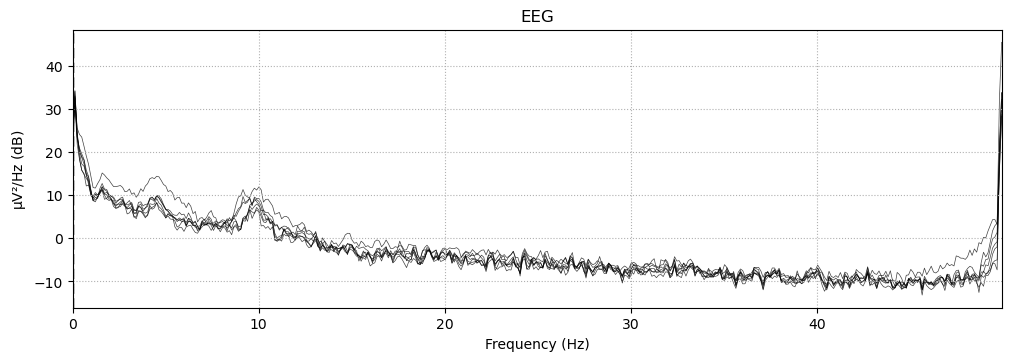

In [60]:
raw_mne.plot_psd(fmin=0,fmax=50)

In [61]:
low_freq = 8.0
high_freq = 11.0
raw_mne_filtered = raw_mne.copy().filter(l_freq=low_freq,h_freq=high_freq)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 11 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 11.00 Hz
- Upper transition bandwidth: 2.75 Hz (-6 dB cutoff frequency: 12.38 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


Effective window size : 8.192 (s)


C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_35088\2796164830.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_mne_filtered.compute_psd().plot()
c:\Users\AbsoluteZeno\anaconda3\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


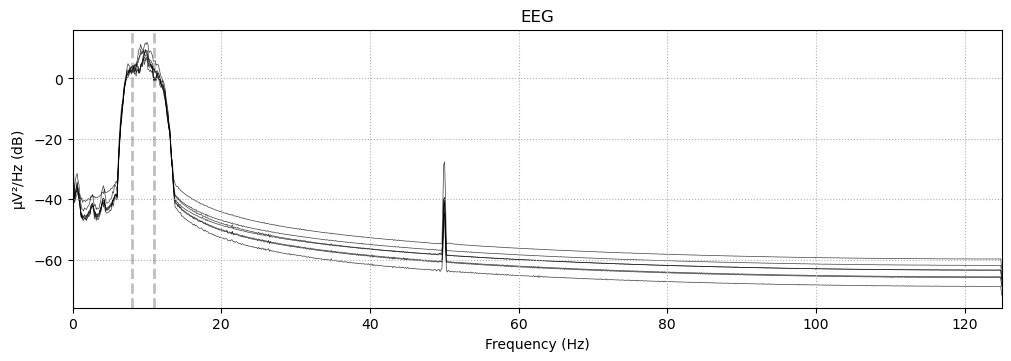

In [62]:
raw_mne_filtered.compute_psd().plot()

## Channel Information

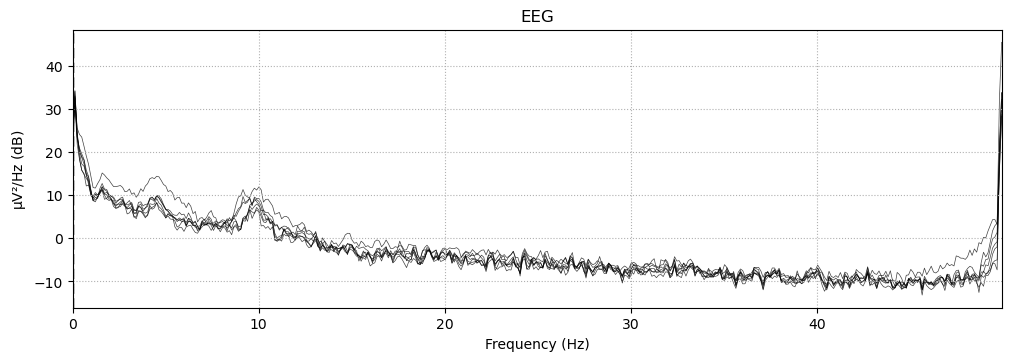

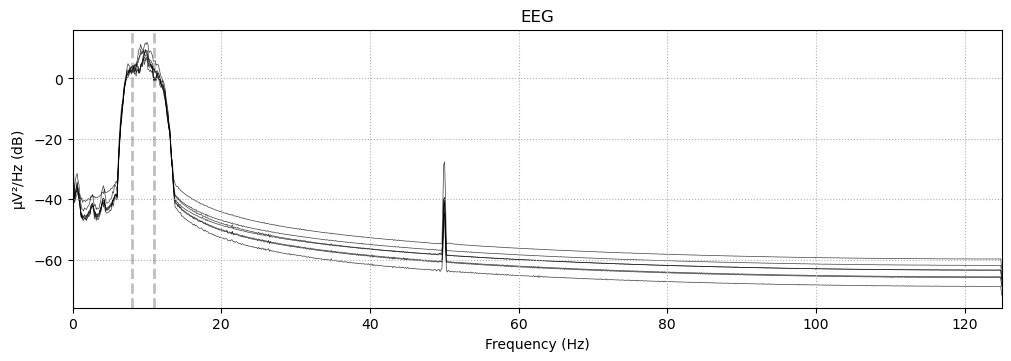

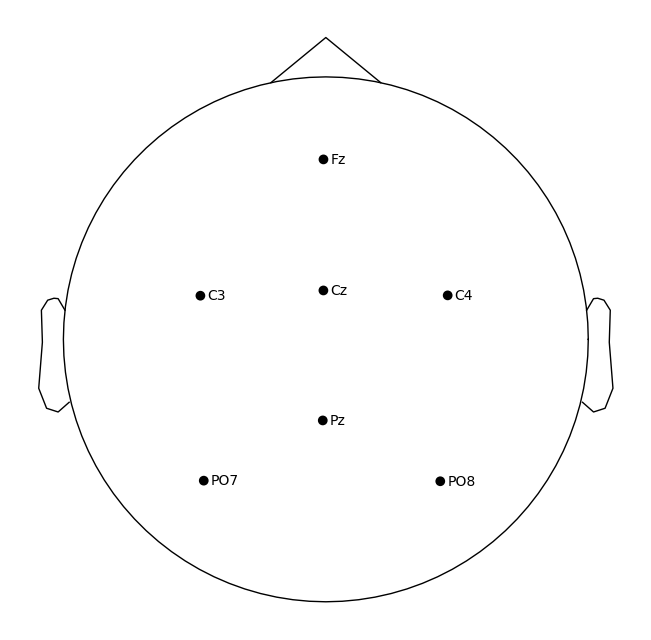

In [63]:
right_electrodes  = ['C4','PO8']
left_electrodes   = ['C3','PO7']
central_electrode = ['Fz','Cz','Pz']

# Set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw_mne.set_montage(montage)

# Plot channel locations
raw_mne.plot_sensors(show_names=True);

Effective window size : 8.192 (s)


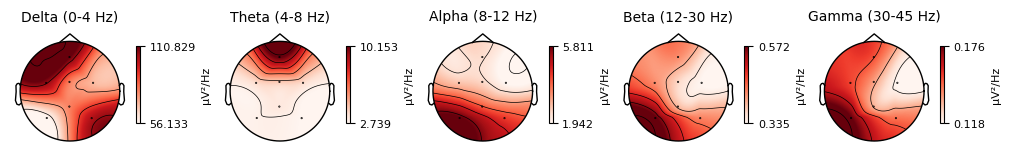

In [64]:
raw_mne.compute_psd().plot_topomap();

# Re-reference (CAR)

In [65]:
mne_car = raw_mne.copy().set_eeg_reference('average')
# mne_car.apply_proj()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


# Bandpass filter

In [66]:
# Apply bandpass filtering (8-11Hz) to extract data in the alpha frequency
mne_alpha = mne_car.filter(l_freq=8.0, h_freq=11.0, fir_design='firwin', verbose=False)
mne_alpha.describe()

<RawArray | 8 x 54150 (216.6 s), ~3.3 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fz    EEG   µV       -17.14      -1.54      -0.00       1.53      16.94
 1  C3    EEG   µV       -12.23      -0.92      -0.00       0.92       9.47
 2  Cz    EEG   µV       -12.97      -0.84       0.00       0.85      13.44
 3  C4    EEG   µV        -9.64      -0.90      -0.00       0.90       9.88
 4  Pz    EEG   µV       -10.39      -0.88      -0.00       0.88      12.23
 5  PO7   EEG   µV       -29.48      -1.64       0.01       1.63      28.87
 6  PO8   EEG   µV       -16.53      -1.70      -0.00       1.71      16.61
 7  EOG   EOG   µV      2148.02    3002.24    3259.49    4156.95    4943.27


Effective window size : 8.192 (s)


c:\Users\AbsoluteZeno\anaconda3\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


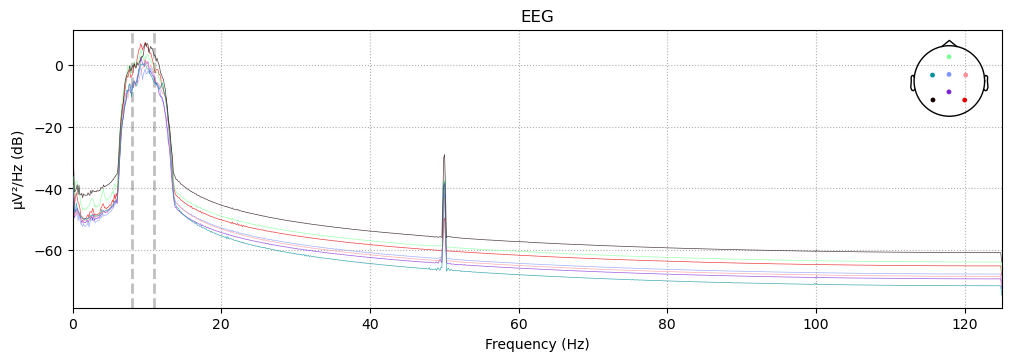

In [67]:
mne_alpha.compute_psd().plot()

# Events

In [68]:
Events = [data for data in streams if data['info']['type'] == ['Markers']][0]

event_index = Events["time_series"].T[0] #Get all event marker of experiment 
event_timestamp = (((Events["time_stamps"].T) - EEG["time_stamps"][0]) *250).astype('int')

print("Event index\n shape:", event_index.shape, "\n", event_index)
print("\nEvent timestamps\n shape:",event_timestamp.shape, "\n", event_timestamp)

Event index
 shape: (31,) 
 [0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0]

Event timestamps
 shape: (31,) 
 [ 1504  3251  4969  6655  8288 10039 11783 13494 15158 16983 18815 20575
 22256 23988 25661 27504 29379 31183 32823 34503 36362 38195 39916 41678
 43550 45416 47124 48772 50419 52143 53337]


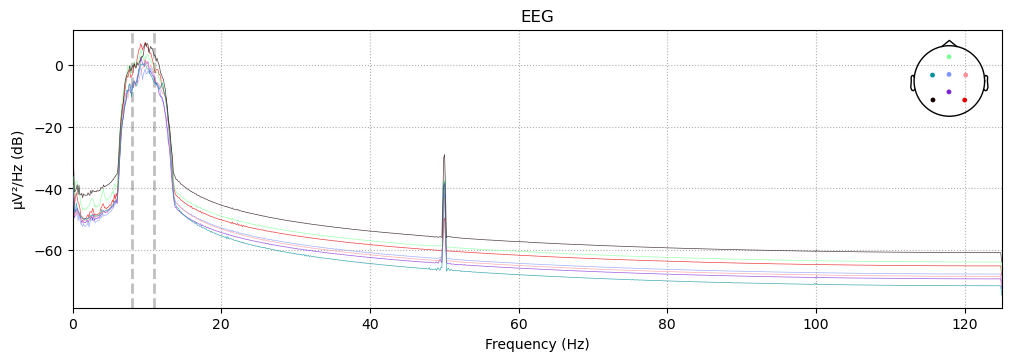

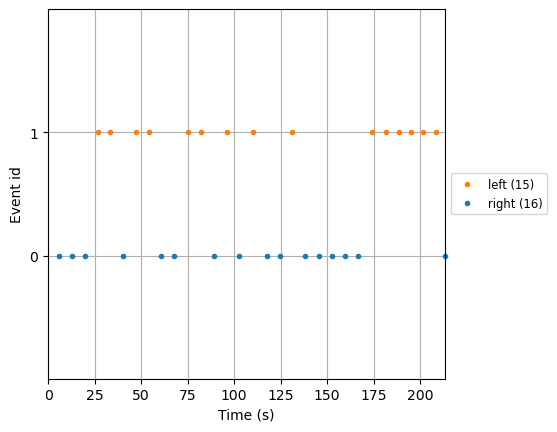

C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_35088\852443096.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [69]:
events = np.column_stack((np.array(event_timestamp, dtype = int),
                        np.zeros(len(event_timestamp), dtype = int),
                        np.array(event_index, dtype = int)))

events_id = { # Set up your event name
     'right': 0,
     'left': 1
}

# Plotting events
fig = mne.viz.plot_events(
    events, sfreq=mne_alpha.info["sfreq"], first_samp=mne_alpha.first_samp, event_id= events_id
)
ax = fig.axes[0]
x_lim_seconds = [10, 20]
ax.set_xlim(x_lim_seconds)
fig.show()

# Epoch data

In [70]:
epochs = mne.Epochs(mne_alpha, events, 
        tmin= -0.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax= 3.0,      # final timestamp (10 means set epoch duration 10 second)
        event_id =events_id,
        preload = True,
        verbose=True,
        picks = ['eeg']
    )
epochs

Not setting metadata
31 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 31 events and 876 original time points ...
0 bad epochs dropped


Number of events,31
Events,left: 15right: 16
Time range,-0.500 – 3.000 s
Baseline,-0.500 – 0.000 s


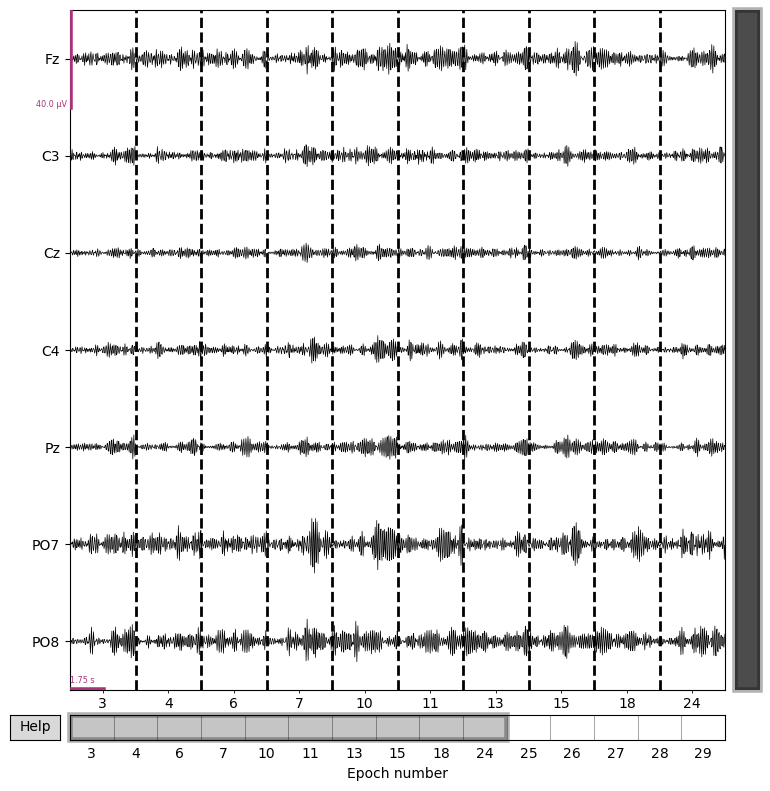

In [71]:
epochs['left'].plot(n_epochs=10);

    Using multitaper spectrum estimation with 7 DPSS windows


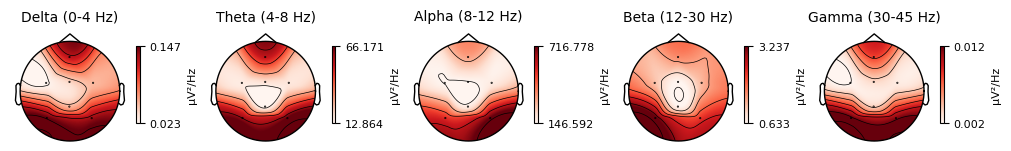

In [72]:
epochs['right'].compute_psd().plot_topomap();

    Using multitaper spectrum estimation with 7 DPSS windows


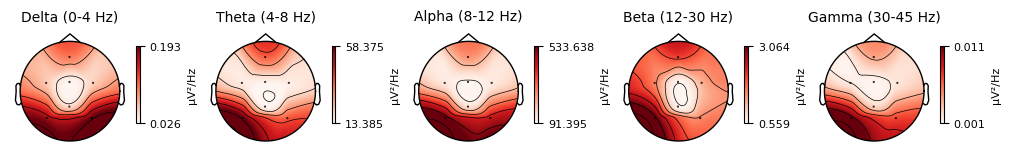

In [73]:
epochs['left'].compute_psd().plot_topomap();

In [74]:
epochs['right'].average()

Condition,right
Data kind,average
Timepoints,876 samples
Channels,7 channels
Number of averaged epochs,16
Time range (secs),-0.5 – 3.0
Baseline (secs),-0.500 – 0.000 s


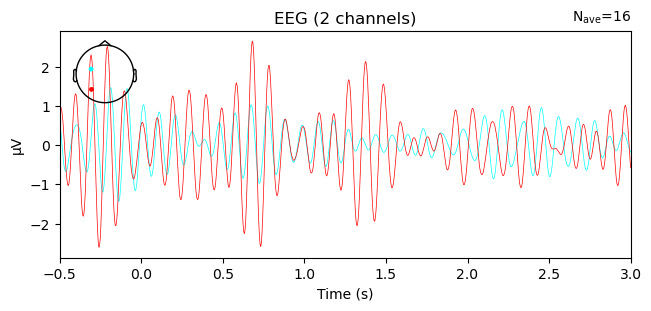

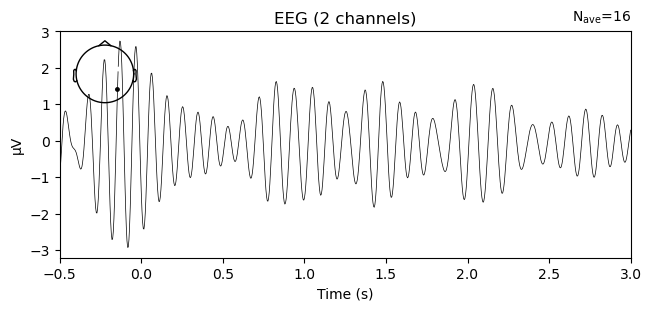

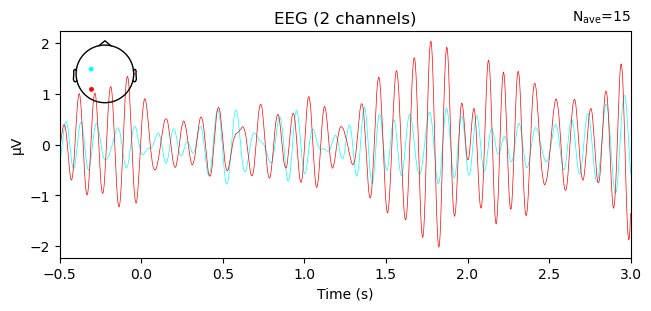

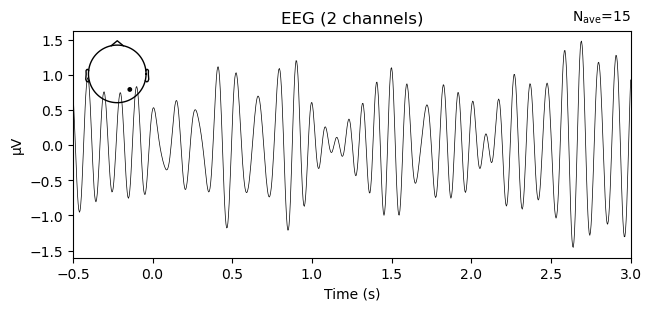

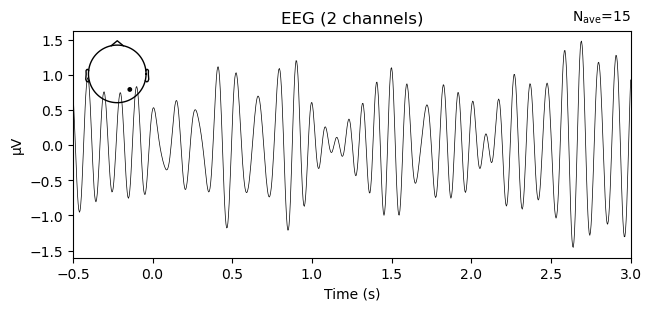

In [75]:
epochs['right'].average().plot(picks=left_electrodes)
epochs['right'].average().plot(picks=right_electrodes)

epochs['left'].average().plot(picks=left_electrodes)
epochs['left'].average().plot(picks=right_electrodes)

In [76]:
# Create a function for plotting epoch data
def plot_ERD(data, sf=250.0):
    
    # Square data 
    data = np.square(data)
    print(data.shape)

    # Calculate the average across epochs for each channel
    averaged_data = np.mean(data, axis=0)
    
    # Create time vector based on the sampling rate and number of time points
    time_points = averaged_data.shape[0]
    time = np.arange(0, time_points) / sf - 5.0
    
    # Set up the plot
    plt.figure(figsize=(8, 6))
    
    # Plot    
    plt.plot(time, averaged_data)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.title('Event-Related Desynchronization')
    plt.show()

In [77]:
data = epochs.get_data()
data.shape

C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_35088\3517092151.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


(31, 7, 876)

In [78]:
data

array([[[-3.71279337e-07, -4.73573140e-07, -5.00054875e-07, ...,
          3.37759444e-07,  4.30501262e-07,  4.82379379e-07],
        [ 1.25662200e-06,  1.37424746e-06,  1.42869019e-06, ...,
         -1.06906298e-06, -1.10820515e-06, -1.10249457e-06],
        [ 6.68277468e-07,  8.53049619e-07,  1.00538797e-06, ...,
          2.39861586e-07,  2.77305848e-07,  2.96350066e-07],
        ...,
        [-1.57387192e-08, -5.49968016e-08, -9.56285171e-08, ...,
         -6.65228113e-08,  6.98343264e-08,  1.99886126e-07],
        [ 6.91871482e-07,  5.99739314e-07,  4.15522280e-07, ...,
         -2.51524201e-07, -1.08299690e-06, -1.83884651e-06],
        [-1.39152679e-06, -1.57147080e-06, -1.67462975e-06, ...,
          4.51146789e-07,  7.13247903e-07,  9.40106272e-07]],

       [[-5.33504809e-07, -7.33252358e-07, -9.13689868e-07, ...,
         -3.12479160e-06, -3.17139768e-06, -3.07607879e-06],
        [ 6.72024170e-08, -2.77624542e-08, -1.38177055e-07, ...,
         -1.31992221e-06, -1.41193781e

In [79]:
df = np.concatenate((data, data),axis = 0)

In [80]:
df.shape

(62, 7, 876)

(7, 876)


C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_35088\3123515747.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


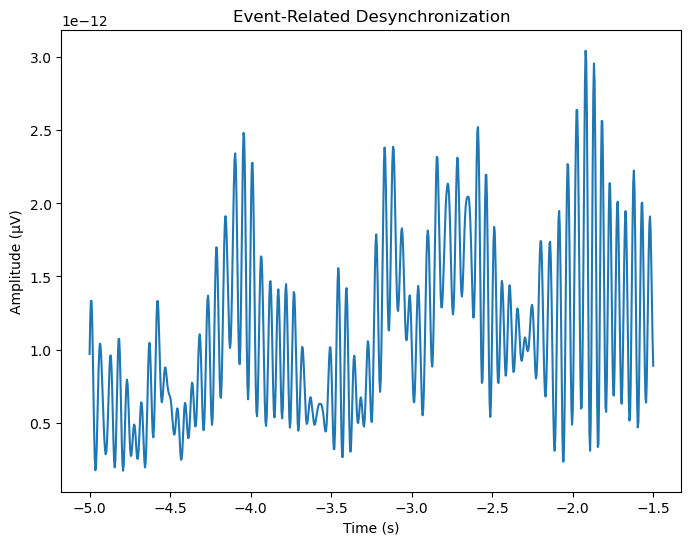

In [81]:
# Select events
data = epochs.get_data()

x = data.shape[0]

epochs_L_l = data[ : int(x*.25), 0, :]
epochs_L_r = data[ : int(x*.25), 2, :]

epochs_R_l = data[int(x*.25) : int(x*.5), 0, :]
epochs_R_r = data[int(x*.25) : int(x*.5), 2, :]

epochs_R = data[int(x*.25) : int(x*.5), :, :]
epochs_F = data[int(x*.5) : int(x*.75), :, :]
epochs_T = data[int(x*.75) : x, :, :]

plot_ERD(epochs_L_r, sf = 250.0)

# Feature Extraction Using CSP

In [82]:
from mne.decoding import CSP
from sklearn.model_selection import train_test_split, cross_val_score

# Get EEG data and events
X = epochs.get_data()
y = epochs.events[:, -1]

# Initilize CSP
csp = CSP(n_components = 4, norm_trace = False)

# Fit CSP to data 
csp.fit(X, y)

# Visualize CSP patterns
csp.plot_patterns(epochs.info);

Computing rank from data with rank=None
    Using tolerance 8.8e-07 (2.2e-16 eps * 7 dim * 5.7e+08  max singular value)
    Estimated rank (mag): 7
    MAG: rank 7 computed from 7 data channels with 0 projectors
Reducing data rank from 7 -> 7
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7e-07 (2.2e-16 eps * 7 dim * 4.5e+08  max singular value)
    Estimated rank (mag): 7
    MAG: rank 7 computed from 7 data channels with 0 projectors
Reducing data rank from 7 -> 7
Estimating covariance using EMPIRICAL


C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_35088\11072717.py:5: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data()


Done.


LinAlgError: The leading minor of order 7 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.